# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [5]:
df . head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no._of_dependants,marital_status,income,region,activity_of_customer,age_flag,department,income_flag,family_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,Highly active customer,Young adult,beverages,Low income,Family
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Highly active customer,Young adult,beverages,Low income,Family
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Highly active customer,Young adult,beverages,Low income,Family
3,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Highly active customer,Young adult,beverages,Low income,Family
4,2295261,1,9,1,16,0.0,46149,2,1,Zero Calorie Cola,...,2/17/2019,3,married,40423,South,Highly active customer,Young adult,beverages,Low income,Family


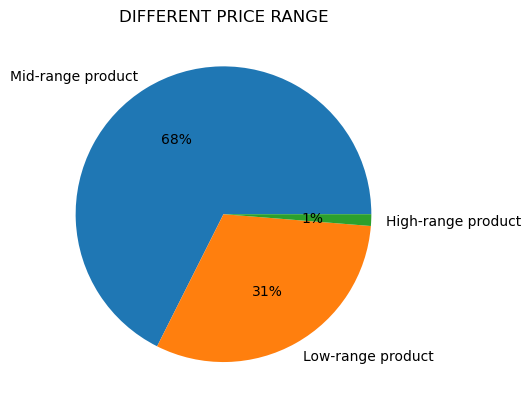

In [6]:
range_product=df['price_range_loc'].value_counts().plot.pie(title='DIFFERENT PRICE RANGE',label='',autopct=('%1.f%%'))

In [7]:
# exporting vis
range_product.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','pie_price_range.png'))

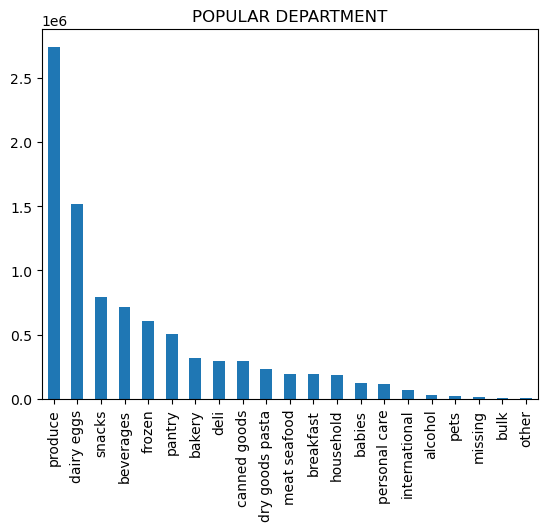

In [10]:
# department popularity
popular_products=df['department'].value_counts(dropna=False).plot.bar()
plt.title('POPULAR DEPARTMENT')
plt.show()

In [11]:
# exporting chart
popular_products.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','popular_products.png'))

In [12]:
# creating a crosstab between loyalty_flag and department-normalized
loyalty_department_1=pd.crosstab(index=df['department'],columns=df['loyalty_flag'],normalize='index')

In [13]:
 # creating second crosstab to put labels on chart
loyalty_department_2=pd.crosstab(index=df['department'],columns=df['loyalty_flag'])


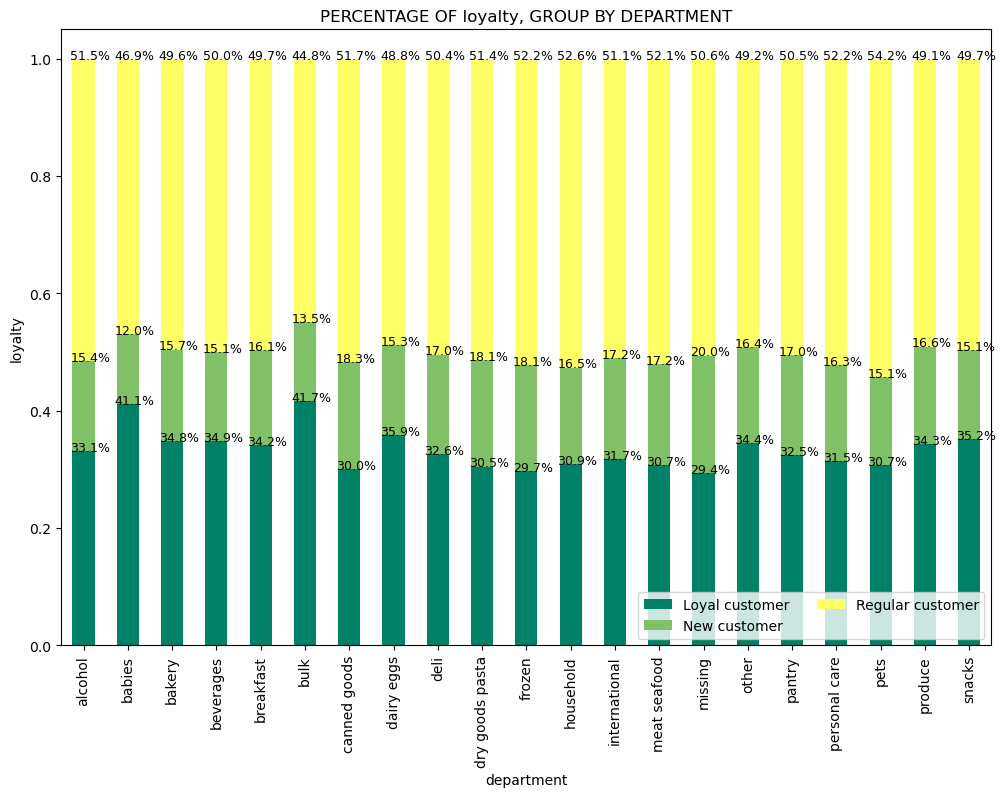

In [15]:
# normalize bar chart of loyalty, group by department
stacked_loyalty_department = loyalty_department_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12, 8))
plt.title('PERCENTAGE OF loyalty, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('loyalty')

for n, x in enumerate([*loyalty_department_2.index.values]):
    for proportion, y_loc in zip(loyalty_department_1.loc[x], loyalty_department_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [16]:
# exporting visualisation
stacked_loyalty_department.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','loyalty_department.png'))

In [17]:
# creating a crosstab between customer's region and department-normalized
region_department_1=pd.crosstab(index=df['department'],columns=df['region'],normalize='index')

In [18]:
 # creating second crosstab to put labels on chart
region_department_2=pd.crosstab(index=df['department'],columns=df['loyalty_flag'])


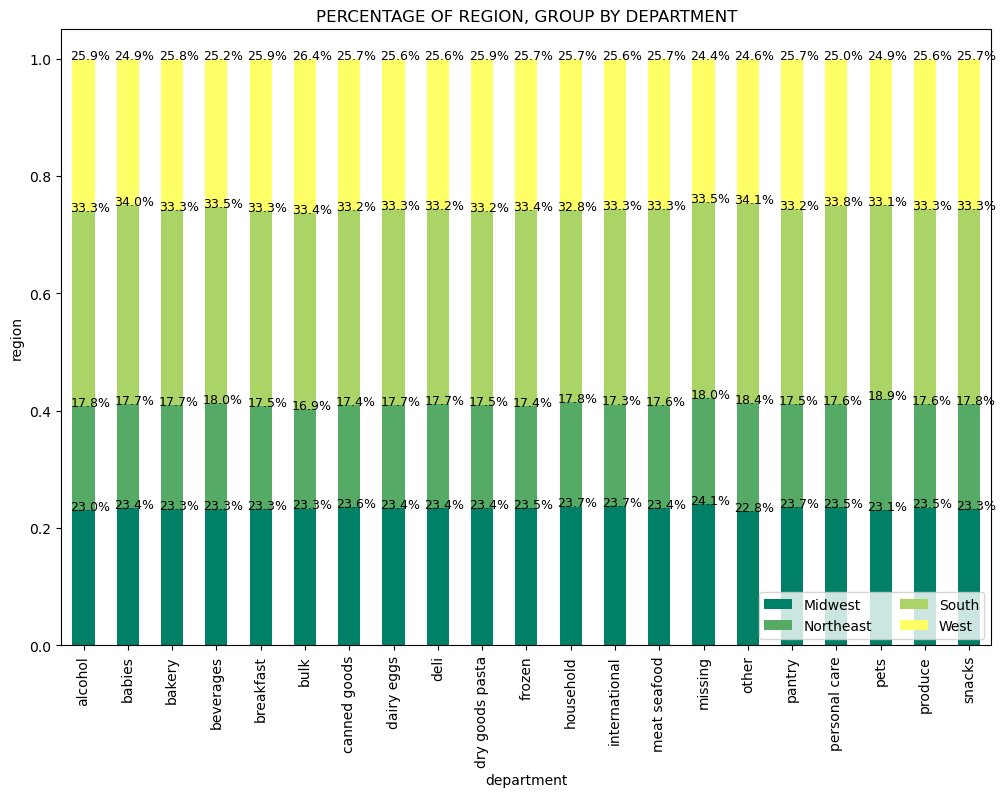

In [20]:
# normalize bar chart of region, group by department
stacked_region_department = region_department_1.plot(kind='bar', stacked=True, colormap='summer', figsize=(12, 8))
plt.title('PERCENTAGE OF REGION, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('region')

for n, x in enumerate([*region_department_2.index.values]):
    for proportion, y_loc in zip(region_department_1.loc[x], region_department_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [21]:
# exporting visualisation
stacked_region_department.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','region_department.png'))

In [22]:
# types of goods
df.loc[df['department_id']==18,'Profile']='Customers with babies'
df.loc[df['department_id']==8,'Profile']='Customers with pets'
df.loc[df['department_id']==12,'Profile']='Customers who eat meat'
df.loc[~df['department_id'].isin([8,12,18]),'Profile']='Customers with other product'

In [23]:
df['Profile'].value_counts(dropna=False)

Customers with other product    8660577
Customers who eat meat           194723
Customers with babies            121114
Customers with pets               23586
Name: Profile, dtype: int64

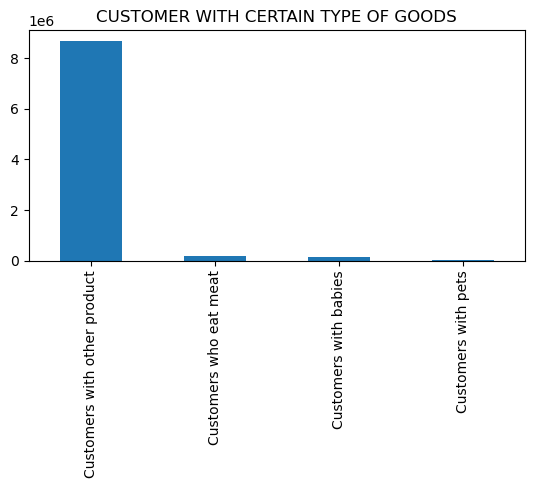

In [24]:
profile=df['Profile'].value_counts(dropna=False).plot.bar(title='CUSTOMER WITH CERTAIN TYPE OF GOODS')
plt.subplots_adjust(bottom=0.4) #adjust margins

In [26]:
# export the plot
profile.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','profile.png'))